In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import california_housing

In [3]:
calihousing = california_housing.fetch_california_housing()

In [4]:
data = pd.DataFrame(calihousing.data,columns=calihousing.feature_names)
data = data[['MedInc','HouseAge','AveBedrms']]
target = calihousing.target
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.25, random_state=42)
X_train.head()

,MedInc,HouseAge,AveBedrms
8158,4.2143,37.0,0.973529
18368,5.3468,42.0,1.087940
19197,3.9191,36.0,1.059748
3746,6.3703,32.0,0.990196
13073,2.3684,17.0,1.035503


In [5]:
def addConstantFunc(X):

    x0 = np.ones(len(X))

    #add a constant
    X['constant'] = x0

    return X


def calculate_cost_function(X,y, coefficients):



    #add a constant
    X =  addConstantFunc(X)

    cost = np.sum((X.dot(coefficients) - y)**2)/ (2*len(y))

    return cost


def LinearRegression(X,y, alpha, n_iterations, step_loss = True):

    """
    if step loss is true, the function returns the gradient descent output


    """
    X_ = addConstantFunc(X)

    gradient_preds = []

    #create base intercept
    coefficients = np.array(np.zeros(X_.shape[1]))

    cost_history = [0] * n_iterations

    for i in range(n_iterations):

        h = X_.dot(coefficients)

        loss = h - y

        gradient = X_.T.dot(loss)/ len(y)

        coefficients = coefficients - alpha  * gradient

        cost = calculate_cost_function(X_,y, coefficients)

        gradient_preds.append(tuple([i, cost]))

        cost_history[i] = cost

        steploss = pd.DataFrame(gradient_preds,columns=['Steps','Loss'])



    if step_loss==True:
        return (coefficients, cost_history)

    else:
        return coefficients


def predict(X, coefficients):

    X = addConstantFunc(X)
    prediction = X.dot(coefficients)
    return prediction

In [6]:
coeff  = LinearRegression(X_train, y_train, 0.001, 100, step_loss=False)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
predictions = predict(X_test, coeff)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
Results =pd.DataFrame({'Prediction':predictions,'Actuals':y_test})

In [9]:
Results.reset_index(inplace=True)
Results.drop('index',axis=1,inplace=True)

(0, 200)

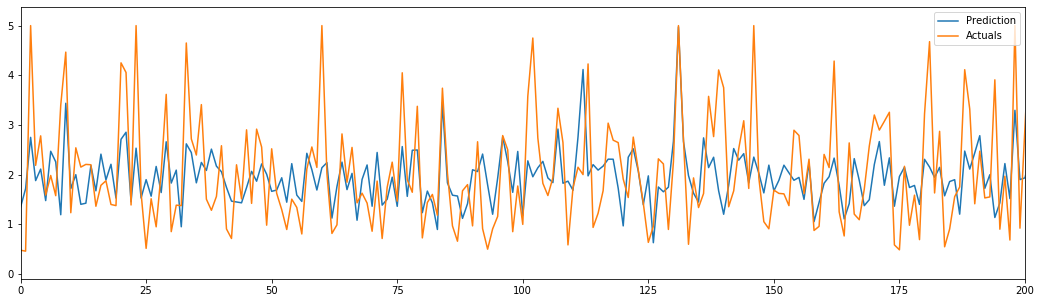

In [13]:
Results.plot(figsize=(18,5))
plt.xlim(0,200)